In [1]:
from utils import load_data
from utils import acrobot_visualize_point, cartpole_visualize_point
import numpy as np
import pickle
import re
import click
from systems.acrobot import Acrobot
from matplotlib import pyplot as plt

In [2]:
from utils import load_data
env_id = 0
system = 'acrobot_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path']/np.array([np.pi, np.pi, 6, 6]),path_dict['start_goal']/np.array([np.pi, np.pi, 6, 6])

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44130319, -0.40049396, -0.17900291,  0.20693734],
        [ 0.51785798,  0.78154969,  0.59162705, -0.50202684],
        [ 0.77845684,  0.52050304,  0.10149964, -0.12560298]]),
 array([[0.        , 0.        , 0.        , 0.        ],
        [0.79808112, 0.48041781, 0.        , 0.        ]]))

In [3]:
setup = 'default_norm'
# setup = 'norm_nodiff_noaug_20step2e-2'

data_fn = 'acrobot_obs_path_data.npy'
gt_fn = 'acrobot_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))
c2g = np.load('{}/acrobot_obs_cost_to_go.npy'.format(setup))
csf= np.load('{}/acrobot_obs_cost_so_far.npy'.format(setup))
c = np.load('{}/acrobot_obs_cost.npy'.format(setup))
start_id = 0
end_id = 18
# start_id = 9
# end_id = 18
data[start_id:end_id, :4], gt[start_id:end_id]

(array([[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44130319, -0.40049396, -0.17900291,  0.20693734],
        [ 0.51785798,  0.78154969,  0.59162705, -0.50202684],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.07836297, -0.17056428,  0.18107719, -0.41303746],
        [ 0.00786703, -0.1493748 , -0.26408768,  0.42104782],
        [-0.28368059,  0.47980372, -0.06044505,  0.41753025],
        [ 0.33609031, -0.84215921, -0.64869047,  0.09831128],
        [-0.37911599, -0.458542  , -0.33615473,  0.28004222],
        [-0.44327551, -0.41556337,  0.07031953, -0.13069033],
        [ 0.67573328,  0.4155318 ,  0.25019954, -0.49337894],
        

In [4]:
c2g[start_id:end_id],csf[start_id:end_id],c[start_id:end_id]

(array([5.12, 4.74, 4.12, 3.56, 2.02, 1.46, 1.34, 0.42, 5.16, 4.78, 4.16,
        3.6 , 2.06, 1.5 , 1.28, 0.24, 5.24, 4.86]),
 array([0.  , 0.38, 1.  , 1.56, 3.1 , 3.66, 3.78, 4.7 , 0.  , 0.38, 1.  ,
        1.56, 3.1 , 3.66, 3.88, 4.92, 0.  , 0.38]),
 array([0.38, 0.62, 0.56, 1.54, 0.56, 0.12, 0.92, 0.42, 0.38, 0.62, 0.56,
        1.54, 0.56, 0.22, 1.04, 0.24, 0.38, 0.62]))

<IPython.core.display.Javascript object>


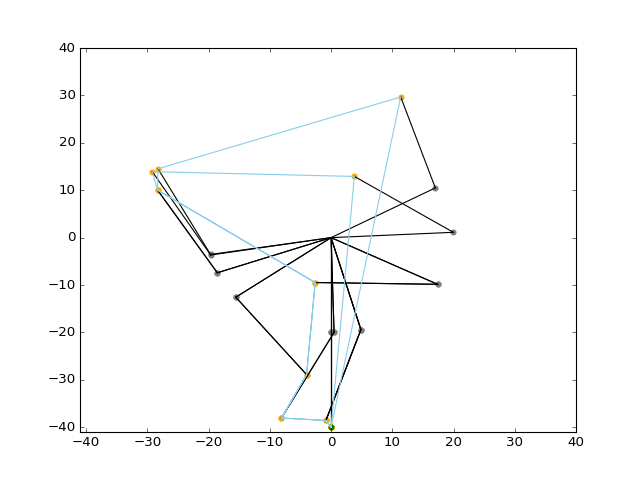

(-41, 40)

In [6]:
%matplotlib notebook
datas = data[start_id:end_id, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[start_id:end_id]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [7]:
gt.std(axis=0)

array([0.42545894, 0.53090079, 0.32452242, 0.38460388])

In [8]:
data[:,].std(axis=0)

array([0.34413544, 0.51726373, 0.31461976, 0.35230726, 0.77537811,
       0.34163483, 0.        , 0.        ])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


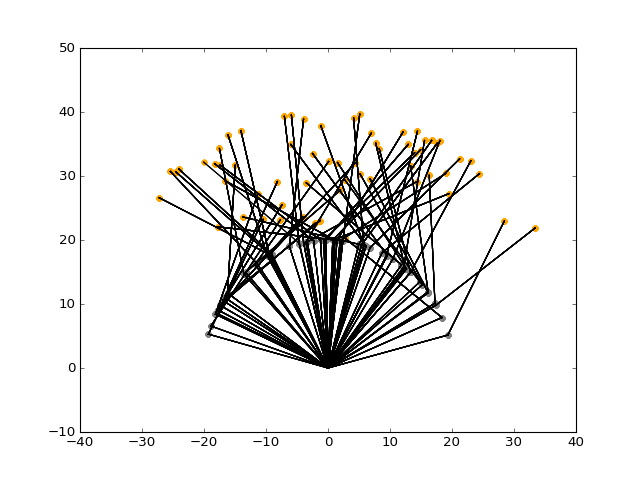

In [10]:
%matplotlib 

d = data[:500, 4:]
endeff = []
node1 = []
for i in range(d.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(d[i, :4] * np.array([np.pi, np.pi, 6,6]))#gts[i, :]
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='black')
    plt.plot([ex1, ex2], [ey1, ey2], color='black')


<IPython.core.display.Javascript object>


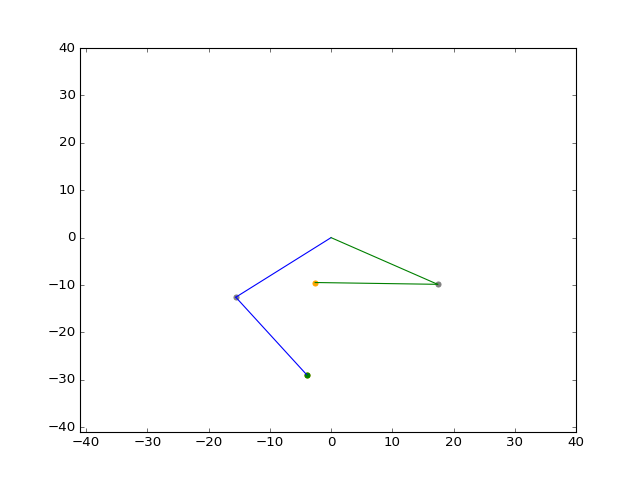

(-41, 40)

In [12]:
%matplotlib notebook
node_id = 11

datas = data[node_id:node_id+1, :4]*np.array([np.pi, np.pi, 6, 6])
gts = gt[node_id:node_id+1]*np.array([np.pi, np.pi, 6, 6])
endeff = []
node1 = []
for i in range(gts.shape[0]):
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(datas[i, :4])#gts[i, :])
    node1.append([ex1, ey1])
    endeff.append([ex2, ey2])
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='blue')
    plt.plot([ex1, ex2], [ey1, ey2], color='blue')
    
    ex1, ey1, ex2, ey2 = acrobot_visualize_point(gts[i, :])#
    plt.scatter(ex1, ey1, color='gray')
    plt.scatter(ex2, ey2, color='orange')
    plt.plot([0, ex1], [0, ey1], color='green')
    plt.plot([ex1, ex2], [ey1, ey2], color='green')

    
endeff = np.array(endeff)
node1 = np.array(node1)
plt.plot(endeff[:,0], endeff[:,1], color='skyblue')

plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.xlim(-41, 40)
plt.ylim(-41, 40)


In [8]:
data[node_id:node_id+1, :4],gt[node_id:node_id+1]

(array([[0., 0., 0., 0.]]),
 array([[ 0.07836297, -0.17056428,  0.18107719, -0.41303746]]))

In [64]:
from utils import load_data
env_id = 0
system = 'cartpole_obs'
traj_id = 0
path_dict = load_data(system, env_id, traj_id)
path_dict['path']
# path_dict['path']/np.array([30, 40, np.pi, 2]),path_dict['start_goal']/np.array([30, 40, np.pi, 2])

array([[-10.2252733 ,   0.        ,   2.77379051,   0.        ],
       [-10.78999025,  -4.11524938,   2.57380031,  -1.46940524],
       [-11.40025604,  -0.75909739,   2.24511758,  -1.2173847 ],
       [-11.39767163,   0.8476704 ,   2.14155191,  -1.14537533],
       [ -9.79390471,   8.0500743 ,   1.7180155 ,  -1.36470897],
       [ -8.37481507,   6.20335132,   1.38348623,  -1.95521721],
       [ -7.34718433,   2.12487694,   0.8969311 ,  -1.96241473],
       [ -7.19461502,  -1.07221622,   0.43726527,  -1.64382429],
       [ -6.21449289,   5.69197845,  -0.34836647,  -2.        ],
       [ -5.57404855,   2.3209318 ,  -0.57838987,  -0.87608559],
       [ -4.36264732,   6.77223004,  -0.88844845,  -1.37313391],
       [ -1.40830519,  11.91394011,  -1.3223046 ,  -1.23319819],
       [  3.53036076,  18.14348622,  -1.60988863,  -0.41167115],
       [  5.06329426,  19.27534569,  -1.63325629,  -0.15056402],
       [  9.85322434,  14.164732  ,  -1.56892078,   0.62230256],
       [ 12.60756595,  10

<IPython.core.display.Javascript object>


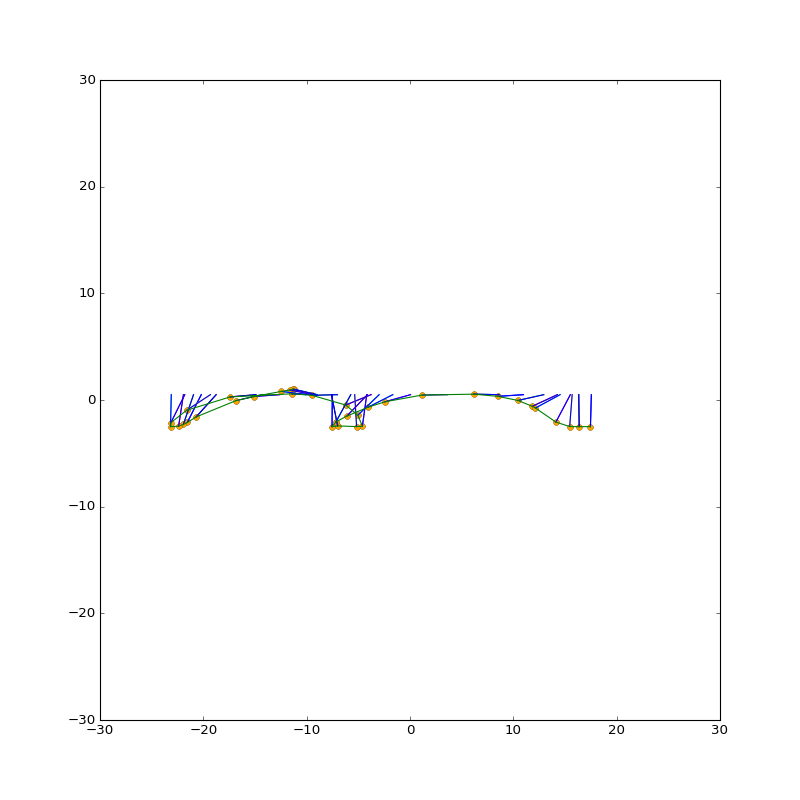

(-30, 30)

In [19]:
%matplotlib notebook
cartpole_visualize_point(path_dict['path'][0])    

fig, ax = plt.subplots(figsize=(10,10))

ends_x, ends_y = [], []
for state in path_dict['path']:
    visualize_cartpole(ax, state)
    x1, y1, x2, y2 = cartpole_visualize_point(state)
    ax.plot([x1, x2],[y1, y2], 'blue')
    ax.scatter(x2, y2, color='orange')
    ends_x.append(x2)
    ends_y.append(y2)
ax.plot(ends_x, ends_y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)

In [83]:
setup = 'default_norm'

data_fn = 'cartpole_obs_path_data.npy'
gt_fn = 'cartpole_obs_gt.npy'

data = np.load('{}/{}'.format(setup, data_fn))[:, 1:]
gt = np.load('{}/{}'.format(setup, gt_fn))
c2g = np.load('{}/cartpole_obs_cost_to_go.npy'.format(setup))
csf= np.load('{}/cartpole_obs_cost_so_far.npy'.format(setup))
c = np.load('{}/cartpole_obs_cost.npy'.format(setup))
start_id = 0
end_id = 30
# start_id = 9
# end_id = 18
data[start_id:end_id, :4], gt[start_id:end_id],c2g[start_id:end_id]

(array([[-0.34084244,  0.        ,  0.88292494,  0.        ],
        [-0.35966634, -0.10288123,  0.81926608, -0.73470262],
        [-0.38000853, -0.01897743,  0.71464312, -0.60869235],
        [-0.37992239,  0.02119176,  0.68167714, -0.57268767],
        [-0.32646349,  0.20125186,  0.54686132, -0.68235448],
        [-0.2791605 ,  0.15508378,  0.44037734, -0.97760861],
        [-0.24490614,  0.05312192,  0.28550204, -0.98120737],
        [-0.2398205 , -0.02680541,  0.13918586, -0.82191215],
        [-0.20714976,  0.14229946, -0.11088849, -1.        ],
        [-0.18580162,  0.0580233 , -0.18410721, -0.43804279],
        [-0.14542158,  0.16930575, -0.28280193, -0.68656696],
        [-0.04694351,  0.2978485 , -0.42090263, -0.6165991 ],
        [ 0.11767869,  0.45358716, -0.51244347, -0.20583557],
        [ 0.16877648,  0.48188364, -0.51988162, -0.07528201],
        [ 0.32844081,  0.3541183 , -0.499403  ,  0.31115128],
        [ 0.4202522 ,  0.26363291, -0.43013551,  0.69209775],
        

In [74]:
data[start_id:end_id, :4]#, gt[start_id:end_id, :]

array([[-0.34084244,  0.        ,  0.88292494,  0.        ],
       [-0.35966634, -0.10288123,  0.81926608, -0.73470262],
       [-0.38000853, -0.01897743,  0.71464312, -0.60869235],
       [-0.37992239,  0.02119176,  0.68167714, -0.57268767],
       [-0.32646349,  0.20125186,  0.54686132, -0.68235448],
       [-0.2791605 ,  0.15508378,  0.44037734, -0.97760861],
       [-0.24490614,  0.05312192,  0.28550204, -0.98120737],
       [-0.2398205 , -0.02680541,  0.13918586, -0.82191215],
       [-0.20714976,  0.14229946, -0.11088849, -1.        ],
       [-0.18580162,  0.0580233 , -0.18410721, -0.43804279],
       [-0.14542158,  0.16930575, -0.28280193, -0.68656696],
       [-0.04694351,  0.2978485 , -0.42090263, -0.6165991 ],
       [ 0.11767869,  0.45358716, -0.51244347, -0.20583557],
       [ 0.16877648,  0.48188364, -0.51988162, -0.07528201],
       [ 0.32844081,  0.3541183 , -0.499403  ,  0.31115128],
       [ 0.4202522 ,  0.26363291, -0.43013551,  0.69209775],
       [ 0.42917638,  0.

<IPython.core.display.Javascript object>


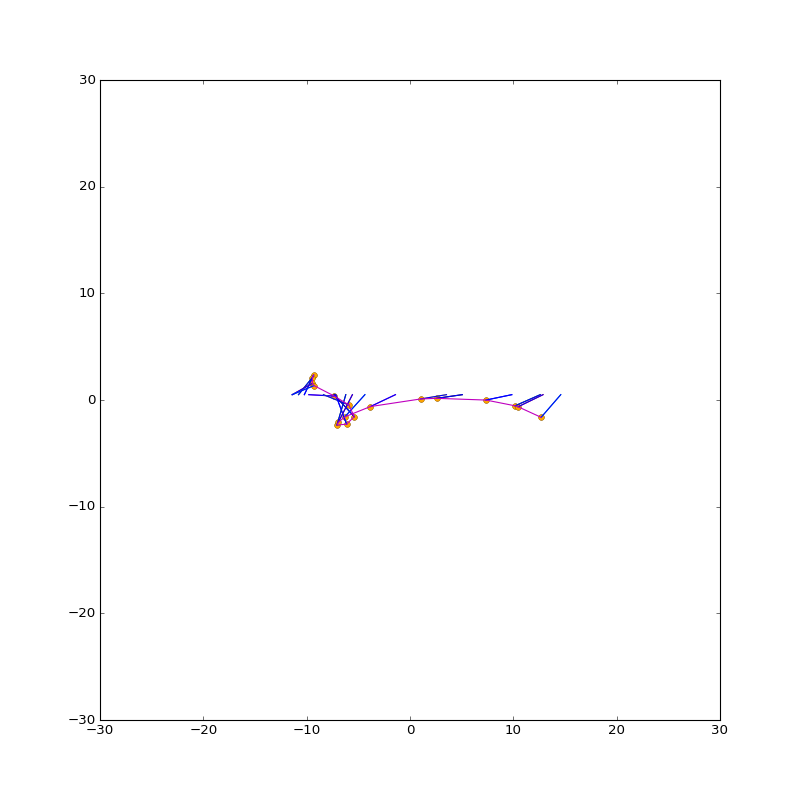

(-30, 30)

In [77]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,10))

ends_x, ends_y = [], []
path = data[start_id:end_id, :4]*np.array([30, 40, np.pi, 2])
for state in path:
    visualize_cartpole(ax, state)
    x1, y1, x2, y2 = cartpole_visualize_point(state)
    ax.plot([x1, x2],[y1, y2], 'blue')
    ax.scatter(x2, y2, color='orange')
    ends_x.append(x2)
    ends_y.append(y2)
ax.plot(ends_x, ends_y)
plt.xlim(-30, 30)
plt.ylim(-30, 30)